In [21]:
# read data with imagedatagenerator:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

import os
import matplotlib.pyplot as plt

# Paths for trains and test images:
train = './data/dino-dragon/train/'
test = './data/dino-dragon/test/'

img_size = 150


train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(train, target_size=(img_size, img_size), batch_size=32)

# validation data generation

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(test, target_size=(img_size, img_size), batch_size=32, shuffle=False)


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [22]:
keras.Input(shape=(img_size, img_size, 3))

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_9')>

In [11]:
def make_model(learning_rate):
    ################# Arch ##################
    inputs = keras.Input(shape=(img_size, img_size, 3))
    
    conv_1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    pool_1 = keras.layers.MaxPool2D((2,2))(conv_1)
    flat_1 = keras.layers.Flatten()(pool_1)
    dense_1 = keras.layers.Dense(64, activation='relu')(flat_1)
    
    outputs = keras.layers.Dense(2, activation='sigmoid')(dense_1)    
    model = keras.Model(inputs, outputs)
    #########################################
    
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.8)
    
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

learning_rate = 0.002
epochs = 10

checkpoint = keras.callbacks.ModelCheckpoint(
            './models/homework_{epoch:02d}_{val_accuracy:.3f}.h5',
            save_best_only=True,
            monitor='val_accuracy',
            mode='max')

model = make_model(learning_rate)
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
50/50 [==============================] - 13s 259ms/step - loss: 0.5703 - accuracy: 0.7045 - val_loss: 0.4530 - val_accuracy: 0.7944
Epoch 2/10
50/50 [==============================] - 12s 234ms/step - loss: 0.3916 - accuracy: 0.8350 - val_loss: 0.3893 - val_accuracy: 0.8452
Epoch 3/10
50/50 [==============================] - 12s 229ms/step - loss: 0.2997 - accuracy: 0.8827 - val_loss: 0.3804 - val_accuracy: 0.8452
Epoch 4/10
50/50 [==============================] - 12s 235ms/step - loss: 0.2586 - accuracy: 0.9065 - val_loss: 0.4085 - val_accuracy: 0.8198
Epoch 5/10
50/50 [==============================] - 11s 229ms/step - loss: 0.2033 - accuracy: 0.9316 - val_loss: 0.3521 - val_accuracy: 0.8579
Epoch 6/10
50/50 [==============================] - 12s 234ms/step - loss: 0.1723 - accuracy: 0.9460 - val_loss: 0.3391 - val_accuracy: 0.8604
Epoch 7/10
50/50 [==============================] - 11s 224ms/step - loss: 0.1312 - accuracy: 0.9655 - val_loss: 0.3360 - val_accuracy: 0.8706

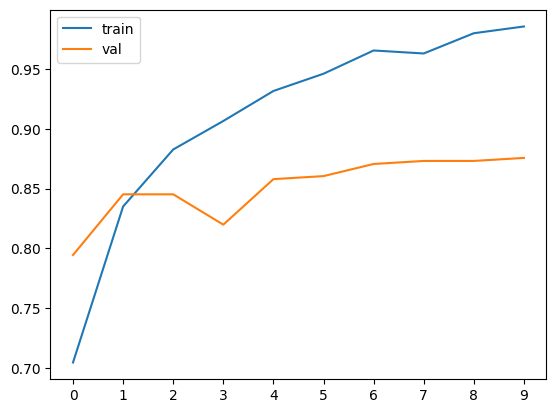

In [14]:
import numpy as np
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Question 1
Since we have a binary classification problem, what is the best loss function for us?

* binary crossentropy
* focal loss
* mean squared error
* categorical crossentropy

--- ANSWER : binary crossentropy

# Question 2: 
* Total number of parameters

-- ANSWER : 11,215,873

In [42]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 175232)            0         
                                                                 
 dense_20 (Dense)            (None, 64)                11214912  
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                          

For the next two questions, use the following data generator for both train and test sets:

* ImageDataGenerator(rescale=1./255)

We don't need to do any additional pre-processing for the images.

* When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
* Use batch_size=20
* Use shuffle=True for both training and test sets.

For training use .fit() with the following params:

```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [38]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(train, target_size=(img_size, img_size), batch_size=20, shuffle=True, class_mode='binary')

# validation data generation

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory(test, target_size=(img_size, img_size), batch_size=20, shuffle=True, class_mode='binary')

def make_model(learning_rate):
    ################# Arch ##################
    inputs = keras.Input(shape=(img_size, img_size, 3))
    
    conv_1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    pool_1 = keras.layers.MaxPool2D((2,2))(conv_1)
    flat_1 = keras.layers.Flatten()(pool_1)
    dense_1 = keras.layers.Dense(64, activation='relu')(flat_1)
    
    outputs = keras.layers.Dense(1, activation='sigmoid')(dense_1)    
    model = keras.Model(inputs, outputs)
    #########################################
    
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.8)
    
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

learning_rate = 0.002
epochs = 10

checkpoint = keras.callbacks.ModelCheckpoint(
            './models/homework_{epoch:02d}_{val_accuracy:.3f}.h5',
            save_best_only=True,
            monitor='val_accuracy',
            mode='max')

model = make_model(learning_rate)
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[checkpoint])

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 20s 243ms/step - loss: 0.6866 - accuracy: 0.5765 - val_loss: 0.6543 - val_accuracy: 0.6396
Epoch 2/10
80/80 [==============================] - 22s 272ms/step - loss: 0.6214 - accuracy: 0.6801 - val_loss: 0.5806 - val_accuracy: 0.7005
Epoch 3/10
80/80 [==============================] - 21s 263ms/step - loss: 0.5417 - accuracy: 0.7491 - val_loss: 0.4706 - val_accuracy: 0.8198
Epoch 4/10
80/80 [==============================] - 21s 264ms/step - loss: 0.4446 - accuracy: 0.8137 - val_loss: 0.4081 - val_accuracy: 0.8426
Epoch 5/10
80/80 [==============================] - 22s 274ms/step - loss: 0.3887 - accuracy: 0.8350 - val_loss: 0.3791 - val_accuracy: 0.8401
Epoch 6/10
80/80 [==============================] - 20s 253ms/step - loss: 0.3569 - accuracy: 0.8457 - val_loss: 0.3712 - val_accuracy: 0.8376
Epoch 7/10
80/80 [==============================] - 21s 260

# Question 3
What is the median of training accuracy for all the epochs for this model?

-- ANSWER : 0.90 (NOT ACCURATE)

In [39]:
np.median(history.history['accuracy'])

0.840338796377182

# Question 4
What is the standard deviation of training loss for all the epochs for this model?

-- ANSWER: 0.11

In [43]:
round(np.std(history.history['val_loss']), 4)

0.1134

Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* rotation_range=40,
* width_shift_range=0.2,
* height_shift_range=0.2,
* shear_range=0.2,
* zoom_range=0.2,
* horizontal_flip=True,
* fill_mode='nearest'

In [45]:
train_gen = ImageDataGenerator(rescale=1./255, 
                               rotation_range=40, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2,
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )
train_ds = train_gen.flow_from_directory(train, target_size=(img_size, img_size), batch_size=20, shuffle=True, class_mode='binary')

# validation data generation

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory(test, target_size=(img_size, img_size), batch_size=20, shuffle=True, class_mode='binary')

def make_model(learning_rate):
    ################# Arch ##################
    inputs = keras.Input(shape=(img_size, img_size, 3))
    
    conv_1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    pool_1 = keras.layers.MaxPool2D((2,2))(conv_1)
    flat_1 = keras.layers.Flatten()(pool_1)
    dense_1 = keras.layers.Dense(64, activation='relu')(flat_1)
    
    outputs = keras.layers.Dense(1, activation='sigmoid')(dense_1)    
    model = keras.Model(inputs, outputs)
    #########################################
    
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.8)
    
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

learning_rate = 0.002
epochs = 10

checkpoint = keras.callbacks.ModelCheckpoint(
            './models/homework_{epoch:02d}_{val_accuracy:.3f}.h5',
            save_best_only=True,
            monitor='val_accuracy',
            mode='max')

model = make_model(learning_rate)
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[checkpoint])

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 19s 233ms/step - loss: 0.6898 - accuracy: 0.5433 - val_loss: 0.6744 - val_accuracy: 0.5102
Epoch 2/10
80/80 [==============================] - 18s 227ms/step - loss: 0.6505 - accuracy: 0.6280 - val_loss: 0.6021 - val_accuracy: 0.7766
Epoch 3/10
80/80 [==============================] - 17s 210ms/step - loss: 0.6233 - accuracy: 0.6644 - val_loss: 0.5517 - val_accuracy: 0.7792
Epoch 4/10
80/80 [==============================] - 17s 208ms/step - loss: 0.5786 - accuracy: 0.7089 - val_loss: 0.4942 - val_accuracy: 0.7868
Epoch 5/10
80/80 [==============================] - 17s 215ms/step - loss: 0.5478 - accuracy: 0.7327 - val_loss: 0.4532 - val_accuracy: 0.8071
Epoch 6/10
80/80 [==============================] - 17s 212ms/step - loss: 0.5254 - accuracy: 0.7403 - val_loss: 0.4911 - val_accuracy: 0.7614
Epoch 7/10
80/80 [==============================] - 18s 220

# Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

### What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.15
* 0.77
* 0.37
* 0.97

In [49]:
np.mean(history.history['val_loss'])

0.4824093520641327

In [48]:
history.history

{'loss': [0.689800500869751,
  0.6504889726638794,
  0.6232843399047852,
  0.5786334872245789,
  0.5477772951126099,
  0.5254401564598083,
  0.5081228613853455,
  0.49701789021492004,
  0.45930713415145874,
  0.4816834032535553],
 'accuracy': [0.5432873368263245,
  0.6279799342155457,
  0.6643663644790649,
  0.7089083790779114,
  0.7327477931976318,
  0.740276038646698,
  0.74153071641922,
  0.7616060376167297,
  0.7860727906227112,
  0.7659974694252014],
 'val_loss': [0.674371063709259,
  0.6020811200141907,
  0.5517035722732544,
  0.4941718280315399,
  0.45316433906555176,
  0.4911212921142578,
  0.40720027685165405,
  0.3759266138076782,
  0.4181261360645294,
  0.3562272787094116],
 'val_accuracy': [0.510152280330658,
  0.7766497731208801,
  0.779187798500061,
  0.7868020534515381,
  0.807106614112854,
  0.7614213228225708,
  0.8350253701210022,
  0.8553299307823181,
  0.796954333782196,
  0.8553299307823181]}